In [20]:
# Анализ датасета Google Books

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")

df = pd.read_csv('google_books_dataset.csv')
df.head()

,book_id,title,subtitle,authors,publisher,published_date,description,page_count,categories,average_rating,...,language,preview_link,info_link,isbn_13,isbn_10,list_price,currency,buyable,search_category,thumbnail
0,LR_VDQAAQBAJ,Bestsellers,"The Path (bestsellers, free bestsellers, bests...","Ivan King, bestsellers",bestsellers,2017-01-04,"Hear What the Critics are Saying ""Wow, what an...",70.0,Young Adult Fiction,NaN,...,en,http://books.google.com/books?id=LR_VDQAAQBAJ&...,https://play.google.com/store/books/details?id...,NaN,NaN,12.99,USD,True,fiction bestsellers,http://books.google.com/books/content?id=LR_VD...
1,WcjTDQAAQBAJ,Bestsellers,"Hell: A Place Without Hope (bestseller books, ...","Ivan King, bestsellers",bestsellers,2017-01-03,"Hear What the Critics are Saying Wow, very ins...",32.0,Comics & Graphic Novels,NaN,...,en,http://books.google.com/books?id=WcjTDQAAQBAJ&...,https://play.google.com/store/books/details?id...,NaN,NaN,9.99,USD,True,fiction bestsellers,http://books.google.com/books/content?id=WcjTD...
2,4fXUDAAAQBAJ,The Bestseller Code,Anatomy of the Blockbuster Novel,"Jodie Archer, Matthew L. Jockers",Macmillan,2016-09-20,"""What if there was an algorithm that could pre...",253.0,Business & Economics,NaN,...,en,http://books.google.com/books?id=4fXUDAAAQBAJ&...,http://books.google.com/books?id=4fXUDAAAQBAJ&...,9.781250e+12,1250088275,NaN,NaN,False,fiction bestsellers,http://books.google.com/books/content?id=4fXUD...
3,yIVuDwAAQBAJ,Bestseller,A Century of America's Favorite Books,Robert McParland,Bloomsbury Publishing PLC,2018-12-15,Whether curled up on a sofa with a good myster...,335.0,Literary Criticism,NaN,...,en,http://books.google.com/books?id=yIVuDwAAQBAJ&...,https://play.google.com/store/books/details?id...,9.781538e+12,1538110008,40.50,USD,True,fiction bestsellers,http://books.google.com/books/content?id=yIVuD...
4,2JHXwAEACAAJ,Bestsellers: Popular Fiction since 1900,NaN,C. Bloom,Palgrave Macmillan,2002-07-09,This guide and reference work of all of the be...,306.0,Literary Criticism,NaN,...,en,http://books.google.com/books?id=2JHXwAEACAAJ&...,http://books.google.com/books?id=2JHXwAEACAAJ&...,9.780334e+12,0333687426,NaN,NaN,False,fiction bestsellers,http://books.google.com/books/content?id=2JHXw...


In [22]:
# проверить типы данных и при необходимости привести их к корректным типам.
num_cols = ['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

if 'publication_date' in df.columns:
    df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

# B. Обработка данных
# Пропущенные значения
print("Пропуски по столбцам:\n", df.isnull().sum())

for col in ['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# категориальные — модой
for col in ['publisher', 'language', 'authors']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode().iloc[0])

# Дубликаты
dups = df[df.duplicated()]
print("Кол-во дубликатов:", len(dups))

df = df.drop_duplicates()

# Выбросы(пример: ratings_count)
if 'ratings_count' in df.columns:
    z = np.abs(stats.zscore(df['ratings_count'].dropna()))
    # оставляем только записи с |z| < 3
    df_no_outliers = df.loc[df['ratings_count'].dropna().index[z < 3]]

Пропуски по столбцам:
 book_id                0
title                  8
subtitle            9164
authors             3525
publisher           8057
published_date       214
description         6796
page_count           214
categories          2452
average_rating     14290
ratings_count          0
language               0
preview_link           0
info_link              0
isbn_13             7764
isbn_10             8026
list_price         12204
currency           12204
buyable                0
search_category        0
thumbnail            669
dtype: int64
Кол-во дубликатов: 0


In [23]:
# C. Визуализация данных(5 графиков)

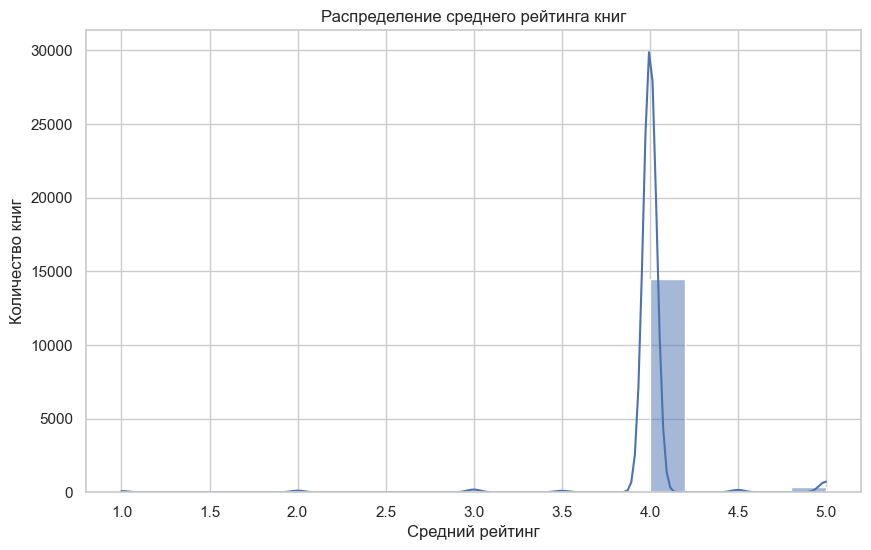

In [24]:
# 1. Гистограмма распределения рейтингов

if 'average_rating' in df.columns:
    sns.histplot(df['average_rating'], bins=20, kde=True)
    plt.title('Распределение среднего рейтинга книг')
    plt.xlabel('Средний рейтинг')
    plt.ylabel('Количество книг')
    plt.show()

In [25]:
# 2. Линейный график: средний рейтинг по годам

if 'publication_date' in df.columns and 'average_rating' in df.columns:
    df_year = df.copy()
    df_year['year'] = df_year['publication_date'].dt.year
    year_rating = df_year.groupby('year')['average_rating'].mean().dropna()

    plt.plot(year_rating.index, year_rating.values, marker='o')
    plt.title('Средний рейтинг книг по годам')
    plt.xlabel('Год')
    plt.ylabel('Средний рейтинг')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Линейный график ломается из-за дат с типом object или много данных NaN.

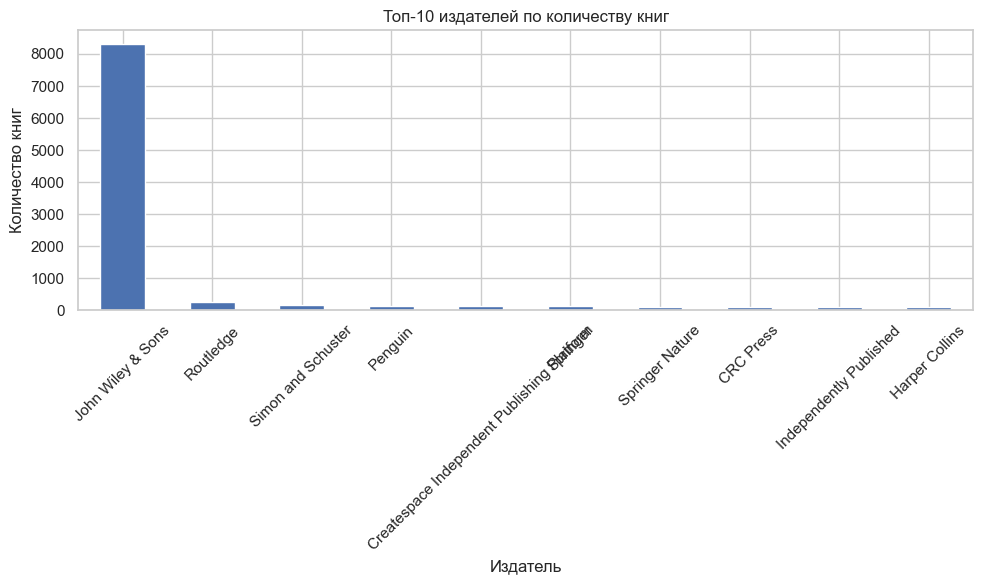

In [26]:
# 3. Столбчатая диаграмма: топ‑10 издателей по количеству книг

if 'publisher' in df.columns:
    top_publishers = df['publisher'].value_counts().head(10)

    top_publishers.plot(kind='bar')
    plt.title('Топ-10 издателей по количеству книг')
    plt.xlabel('Издатель')
    plt.ylabel('Количество книг')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [27]:
# 4. boxplot(число страниц по языку)

if 'num_pages' in df.columns and 'language' in df.columns:
    sns.boxplot(x='language', y='num_pages', data=df[df['language'].isin(df['language'].value_counts().head(5).index)])
    plt.title('Распределение числа страниц по языкам (топ‑5)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

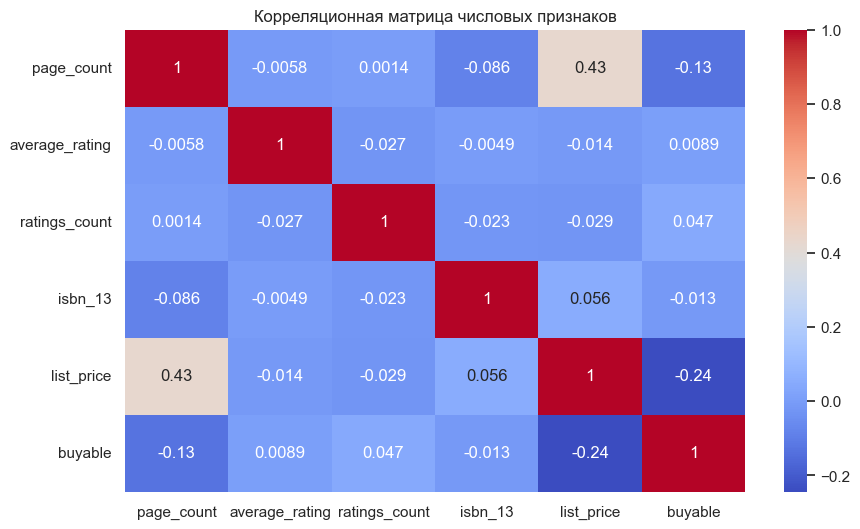

In [28]:
# 5. heatmap корреляций
corr_matrix = df.corr(numeric_only=True)
corr_matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()